In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline

dx=pd.read_pickle('./Data/oneyeardata.pkl')

In [4]:
#normalizing the data between 0 and 1 using min-max relation
minmaxlist=[]
for x1 in dx.columns:
    minmaxlist.append([x1,dx[x1].min(),dx[x1].max()])
    dx[x1]=dx[x1].apply(lambda x: (x-dx[x1].min())/(dx[x1].max()-dx[x1].min()))

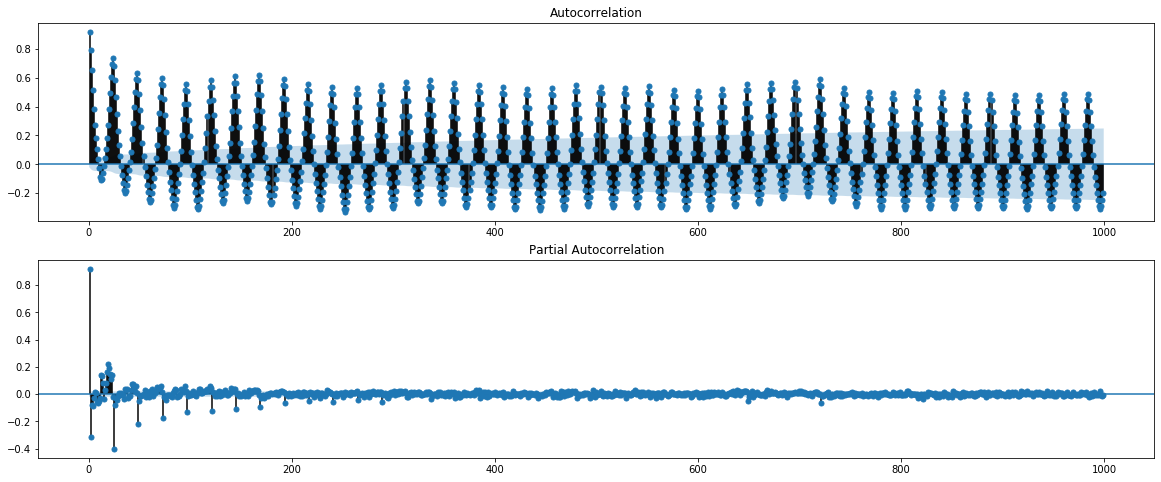

In [20]:
#for second round of feature engineering
#Autocorrelation and Partial autocorrelation is used
#This helps us understand after how many steps the valuse are getting repeated

from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 
plt.figure(figsize=[20,8]) 
plt.subplot(211) 
plot_acf(dx['GRID LOAD'].values, ax=plt.gca(),lags=range(1,1000)) 
plt.subplot(212) 
plot_pacf(dx['GRID LOAD'].values, ax=plt.gca(),lags=range(1,1000)) 
plt.show()

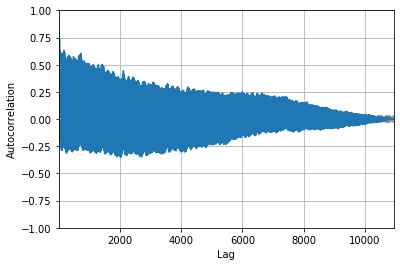

In [8]:
from pandas.plotting import autocorrelation_plot,lag_plot
autocorrelation_plot(dx['GRID LOAD'])

In [9]:
from statsmodels.tsa.stattools import pacf
#Partial auto correlation to obtaing the 1000 lags 
x= pacf(dx['GRID LOAD'].values,nlags=1000)
lags=[]#list to hold the lag values
lag=1#intializing the firts lag 
#determing whether the partial auto correlation is
#in the ranges [-1,-0.08] and [0.08,1]
#if yes the save the lag value
for ind in x:
    if ind>=0.08 or ind<=-0.08:
        lags.append(lag)
    lag+=1

In [14]:
len(lags)

24

In [16]:
#based upon the number of lags and their values 
#new features are added to the data by shifting the data based upon the lag value
for ind in lags:
    str='shift-%d'%ind
    dx[str]=dx['GRID LOAD'].shift(periods=ind)

In [17]:
#dropping the NaN values introduced by shift operations
dx.dropna(inplace=True)

In [19]:
dx.to_pickle('oneyeardataFE1.pkl')